# 6.4 Supervised Machine Learning:Regression

## Step 1 -3
### Set up a Jupyter notebook with visualization and scikit-learn libraries, and import the cleaned data set you chose in the previous Exercise.

In [26]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
path = r'C:\Users\RUZANNA\OneDrive\Desktop\Careerfoundry\Final Project'

In [28]:
df_orders=pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_6.2.pkl' ))

In [29]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,...,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,RESTAURANT_NAME,MAIN_NAME_CALORIS,BASE_NAME_CALORIS,SIDE_1_NAME_CALORIS,SIDE_2_NAME_CALORIS,TOTAL_CALORIS,CALORIES CATEGORY
0,O2226026,2018-12-07 19:17:45,R10001,PICKUP,2.0,2.0,No main,No base,No side_1,No side_2,...,NaN,NaN,NaN,Columbia,NaN,NaN,NaN,NaN,NaN,NaN
1,O1279827,2018-07-14 21:23:43,R10006,IN_STORE,0.0,0.0,No main,No base,No side_1,No side_2,...,NaN,NaN,NaN,Upper East Side,NaN,NaN,NaN,NaN,NaN,NaN
2,O689957,2018-04-12 13:14:42,R10002,PICKUP,0.0,2.0,I1,I7,I11,I8,...,Farro with Summer Vegetables,Charred Broccoli with Lemon,Cauliflower with Garlic and Parmesan,Midtown,227.0,170.0,177.0,90.0,664.0,Middle calories
3,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,...,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese,Upper West Side,227.0,160.0,140.0,361.0,888.0,High Calories
4,O1497863,2018-08-21 18:14:23,R10007,IN_STORE,1.0,0.0,I1,I5,I10,I9,...,Classic Brown Rice,Roasted Sweet Potatoes,Jasper Hill Mac & Cheese,Upper West Side,227.0,160.0,170.0,361.0,918.0,High Calories


In [30]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3304159 entries, 0 to 3304158
Data columns (total 21 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ORDER_ID             object        
 1   DATETIME             datetime64[ns]
 2   RESTAURANT_ID        object        
 3   TYPE                 object        
 4   DRINKS               float64       
 5   COOKIES              float64       
 6   MAIN                 object        
 7   BASE                 object        
 8   SIDE_1               object        
 9   SIDE_2               object        
 10  MAIN_NAME            object        
 11  BASE_NAME            object        
 12  SIDE_1_NAME          object        
 13  SIDE_2_NAME          object        
 14  RESTAURANT_NAME      object        
 15  MAIN_NAME_CALORIS    float64       
 16  BASE_NAME_CALORIS    float64       
 17  SIDE_1_NAME_CALORIS  float64       
 18  SIDE_2_NAME_CALORIS  float64       
 19  TOTAL_CALORIS        

In [31]:
df_orders.shape

(3304159, 21)

In [32]:
df_orders.isnull().sum()

ORDER_ID                    0
DATETIME                    0
RESTAURANT_ID               0
TYPE                        0
DRINKS                      0
COOKIES                     0
MAIN                        0
BASE                        0
SIDE_1                      0
SIDE_2                      0
MAIN_NAME              121650
BASE_NAME              121650
SIDE_1_NAME            121650
SIDE_2_NAME            121650
RESTAURANT_NAME             0
MAIN_NAME_CALORIS      121650
BASE_NAME_CALORIS      121650
SIDE_1_NAME_CALORIS    121650
SIDE_2_NAME_CALORIS    121650
TOTAL_CALORIS          121650
CALORIES CATEGORY      121650
dtype: int64

In [33]:
median_value = df_orders['TOTAL_CALORIS'].median()

# Fill missing values with the median
df_orders['TOTAL_CALORIS'].fillna(median_value, inplace=True)

### Extreme value checks

<Axes: xlabel='TOTAL_CALORIS', ylabel='Count'>

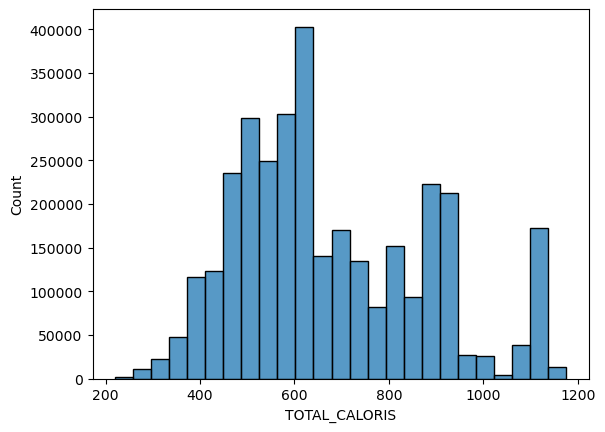

In [34]:
sns.histplot(df_orders['TOTAL_CALORIS'], bins=25, ) # Shows extreme values

In [35]:
df_orders['TOTAL_CALORIS'].mean() # Check the mean

673.0563783401465

In [36]:
df_orders['TOTAL_CALORIS'].median() # Check the median

620.0

In [37]:
df_orders['TOTAL_CALORIS'].max() # Check the max

1175.0

###  we don't have extreme issues

## Step 4
### Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

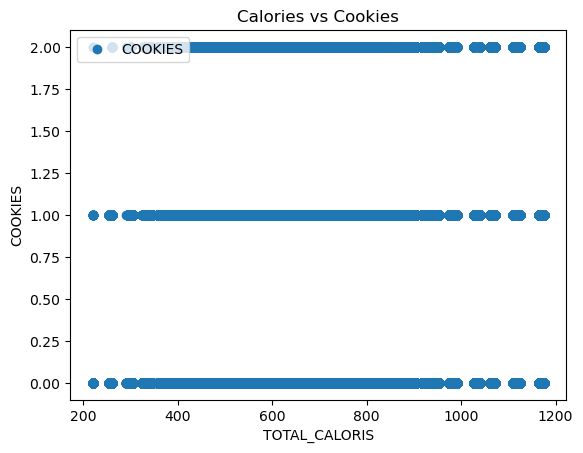

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_orders.plot(x = 'TOTAL_CALORIS', y='COOKIES',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Calories vs Cookies')  
plt.xlabel('TOTAL_CALORIS')  
plt.ylabel('COOKIES')  
plt.show()

## Step 5
 ### State your hypothesis in a markdown cell within your Jupyter notebook.

### In the previous task, we formulated a hypothesis as follows: Customers who choose green bases, such as 'Farm Greens with Mint,' are likely to prefer a healthier lifestyle. However, for linear regression analysis, it's important to focus on continuous variables. Consequently, for the purpose of this exercise, we propose a new hypothesis: Customers who tend to have a higher calorie consumption usually order cookies.

## Step 6 
### Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [39]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_orders['TOTAL_CALORIS'].values.reshape(-1,1)
y = df_orders['COOKIES'].values.reshape(-1,1)

In [40]:
X

array([[ 620.],
       [ 620.],
       [ 664.],
       ...,
       [ 903.],
       [ 933.],
       [1114.]])

In [41]:
y

array([[2.],
       [0.],
       [2.],
       ...,
       [0.],
       [0.],
       [2.]])

## Step 7
### Split the data into two sets: a training set and a test set.

In [42]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Step 8 
### Run a linear regression on the data.
### First, fit the model you created to the training set.
### Then, create a prediction for y on the test set.

In [43]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [44]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

##  Step 9
### Create a plot that shows the regression line on the test set.

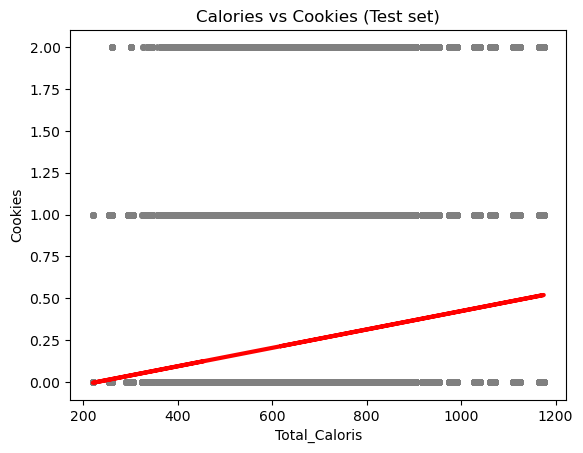

In [46]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Calories vs Cookies (Test set)')
plot_test.xlabel('Total_Caloris')
plot_test.ylabel('Cookies')
plot_test.show()

## Step 10
### Write your own interpretation of how well the line appears to fit the data in a markdown cell.
###  The chart above indicates a notably low correlation between the X and Y variables. This can be attributed to the nature of our project data, which is not well-suited for linear regression analysis. Our Y variable comprises only three discrete values: 0, 1, and 2. Given that the standard linear regression model is designed for continuous dependent variables, the inherent categorical nature of our Y variable suggests that logistic regression may be a more suitable approach in this context.

## Step 11
### Check the model performance statistics—MSE and R2 score

In [47]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [48]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00054794]]
Mean squared error:  0.2839002172907747
R2 score:  0.04076431241439893


### You can see that statistical data demonstrate low correlation between our variables.

## Step 12
### Compare the predicted y values with the actual y values in a dataframe.

In [49]:
y_predicted

array([[0.21635631],
       [0.34402568],
       [0.06348182],
       ...,
       [0.33580662],
       [0.09581012],
       [0.12375492]])

In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1.0,0.216356
1,0.0,0.344026
2,0.0,0.063482
3,0.0,0.181836
4,1.0,0.329779
5,0.0,0.385121
6,0.0,0.077180
7,0.0,0.145672
8,1.0,0.237726
9,0.0,0.127590


## Step 13
### Include your thoughts on how well the model performed on the test set in a markdown cell.
### Include any reflections you have on the impact of possible data bias.

### As previously mentioned, the project data is not well-suited for linear regression analysis due to the minimal correlation between the X and Y variables. The limited relationship between these variables hinders the ability to draw valid conclusions. I am optimistic that in the upcoming lessons, we will delve into logistic regression, providing an opportunity to test the hypotheses developed for this project.